Epoch 1/15


C:\Users\CAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0829 - loss: 2.7176 - val_accuracy: 0.1375 - val_loss: 2.6430
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1488 - loss: 2.5986 - val_accuracy: 0.1167 - val_loss: 2.5689
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1746 - loss: 2.5016 - val_accuracy: 0.1875 - val_loss: 2.4707
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2044 - loss: 2.4200 - val_accuracy: 0.2083 - val_loss: 2.4039
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2354 - loss: 2.3306 - val_accuracy: 0.2417 - val_loss: 2.3767
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2569 - loss: 2.2689 - val_accuracy: 0.2375 - val_loss: 2.3427
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2763 - loss: 2.2329 - val_accuracy: 0.2458 - val_loss: 2.3388
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2963 - loss: 2.1535 - val_accuracy: 0.2708 - val_loss: 2.3263
Ep

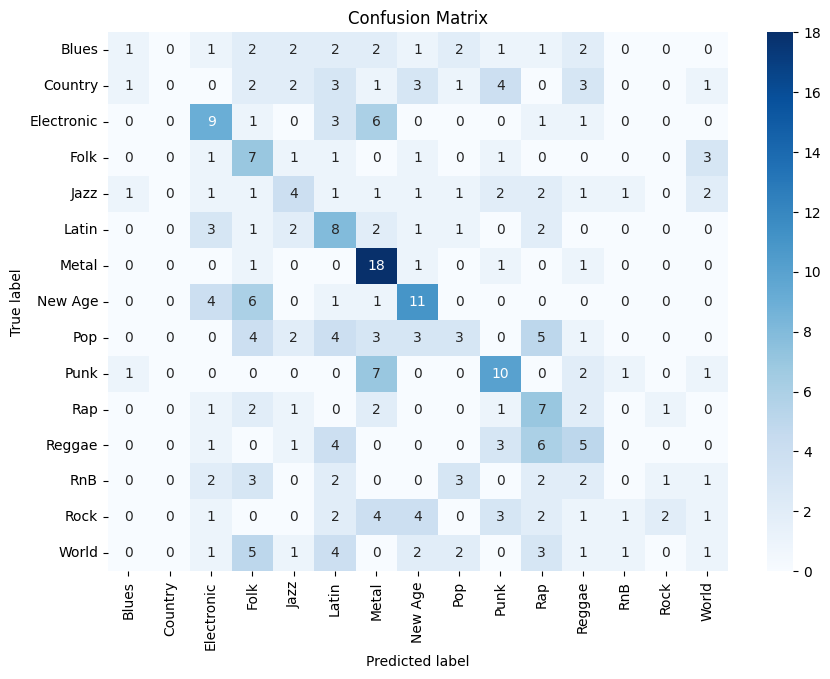

ROC AUC Score: 0.74


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
import pandas as pd
from tensorflow import keras
from keras import layers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric =['energy', 'key', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var',
               'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'percussive_mean', 'tempo_y', 'mfcc1_variance', 
               'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
               'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 
               'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'


X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create and compile the model
model_nn = keras.Sequential([
    layers.Dense(128, input_shape=(X_train_nn.shape[1],), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_nn.fit(X_train_nn, y_train_nn, epochs=15, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_nn.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model_nn.predict(X_test_nn)
predicted_classes = predictions.argmax(axis=1)

# Inverse transform predicted genres
predicted_genres = label_encoder.inverse_transform(predicted_classes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_nn, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


In [30]:
# Check the shape of your training and test data
print(f"Training data shape: {X_train_nn.shape}")
print(f"Test data shape: {X_test_nn.shape}")

Training data shape: (1200, 34)
Test data shape: (300, 34)


Epoch 1/30


C:\Users\CAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0858 - loss: 2.7331 - val_accuracy: 0.1542 - val_loss: 2.6579
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1396 - loss: 2.6339 - val_accuracy: 0.1708 - val_loss: 2.5718
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1707 - loss: 2.5627 - val_accuracy: 0.2125 - val_loss: 2.4703
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2212 - loss: 2.4303 - val_accuracy: 0.2333 - val_loss: 2.3989
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2465 - loss: 2.3604 - val_accuracy: 0.2000 - val_loss: 2.3709
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2511 - loss: 2.2910 - val_accuracy: 0.2792 - val_loss: 2.3032
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2874 - loss: 2.2008 - val_accuracy: 0.2500 - val_loss: 2.3109
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2737 - loss: 2.2068 - val_accuracy: 0.2750 - val_loss: 2.3178
Epo

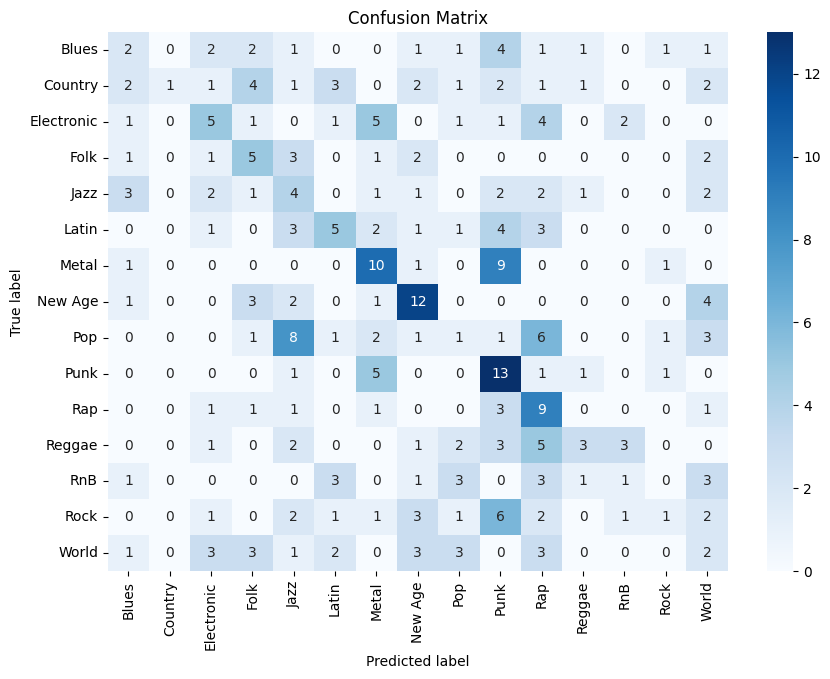

ROC AUC Score: 0.73


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import label_binarize
# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric =['energy', 'key', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var',
               'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'percussive_mean', 'tempo_y', 'mfcc1_variance', 
               'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
               'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 
               'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'


X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Create and compile the model
model_nn = keras.Sequential([
    layers.Dense(128, input_shape=(X_train_nn.shape[1],), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for classification
])

model_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_nn.fit(X_train_nn, y_train_nn, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


# Split the dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
# Build the MLP model
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),  # Adjust input shape to match PCA output
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train_nn)), activation='softmax')  # Output layer (number of classes)
])

# Compile the model
model_mlp.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_mlp = model_mlp.fit(X_train_nn, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_mlp.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions
predictions = model_nn.predict(X_test_nn)
predicted_classes = predictions.argmax(axis=1)

# Inverse transform predicted genres
predicted_genres = label_encoder.inverse_transform(predicted_classes)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_nn, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


SVM Test Accuracy: 0.27
Confusion Matrix:
[[ 1  1  0  3  0  0  1  1  3  1  2  2  0  2  0]
 [ 4  1  0  3  2  1  2  1  0  0  0  1  1  3  2]
 [ 1  2  6  1  1  0  5  0  2  0  1  1  0  0  1]
 [ 2  0  2  5  2  0  1  1  1  0  0  0  0  0  1]
 [ 3  0  1  1  2  1  1  1  1  0  2  0  1  2  3]
 [ 0  2  2  0  1  4  2  0  2  2  1  1  1  2  0]
 [ 0  0  1  2  0  0 16  1  0  1  0  0  0  1  0]
 [ 1  0  3  2  1  0  1 12  1  0  0  0  0  0  2]
 [ 0  5  0  3  2  0  2  1  4  0  2  1  2  1  2]
 [ 0  0  0  0  0  0  6  0  1  8  0  1  0  5  1]
 [ 0  0  2  2  0  0  1  0  0  3  9  0  0  0  0]
 [ 2  0  1  1  0  1  0  0  1  2  5  4  1  2  0]
 [ 1  2  1  1  2  1  0  1  2  0  1  1  2  1  0]
 [ 2  1  2  0  0  2  2  3  1  2  1  0  2  3  0]
 [ 1  2  2  2  1  2  0  1  5  0  1  1  0  0  3]]


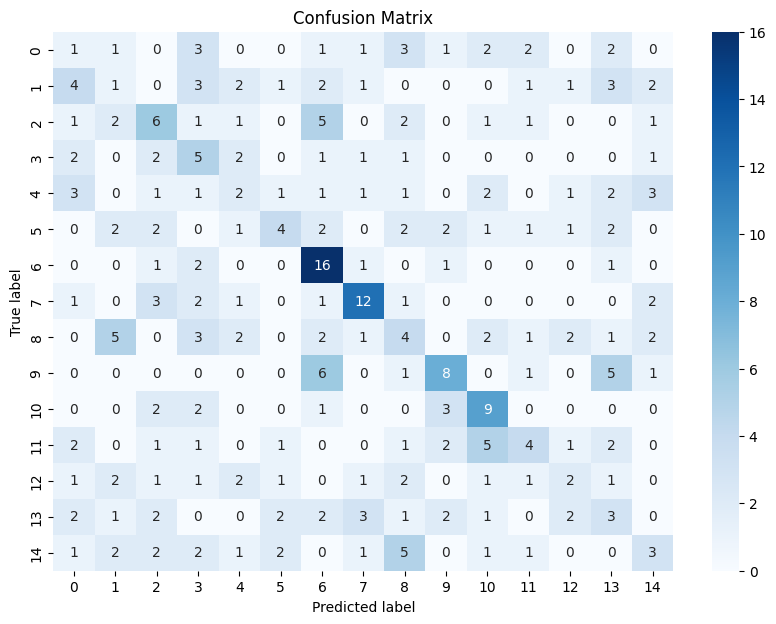

ROC AUC Score: 0.75


In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric =['energy', 'key', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var',
               'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'percussive_mean', 'tempo_y', 'mfcc1_variance', 
               'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
               'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 
               'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'


X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

svm_model = SVC(kernel='rbf',  probability=True)
svm_model.fit(X_train_nn, y_train_nn)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_nn)
test_accuracy = accuracy_score(y_test_nn, y_pred_svm)
print(f"SVM Test Accuracy: {test_accuracy:.2f}")


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_nn, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train_nn), yticklabels=np.unique(y_train_nn))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class classification
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test_nn)  # Encode labels

y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(len(np.unique(y_train_nn))))
y_pred_prob = svm_model.predict_proba(X_test_nn)  # Get predicted probabilities


roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")


In [70]:
from sklearn.model_selection import cross_val_score

model = XGBClassifier( eval_metric='mlogloss')
scores = cross_val_score(model, X_scaled, y_encoded, cv=6, scoring='accuracy')
print(f"Cross-validation accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.2f}")

Cross-validation accuracy scores: [0.168 0.236 0.276 0.288 0.228 0.216]
Mean accuracy: 0.24


In [71]:
model_rf = RandomForestClassifier(n_estimators=1000)
model_xgb = XGBClassifier( use_label_encoder=False, eval_metric='mlogloss', n_estimators=1000, learning_rate=0.001)

ensemble_model = VotingClassifier(estimators=[
    ('rf', model_rf),
    ('xgb', model_xgb)
], voting='soft')

ensemble_model.fit(X_train_nn, y_train_nn)
y_pred_ensemble = ensemble_model.predict(X_test_nn)
accuracy = accuracy_score(y_test_nn, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {accuracy:.2f}")


C:\Users\CAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:06:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Accuracy: 0.27


In [72]:
# Evaluate MLP model
test_loss_mlp, test_accuracy_mlp = model_mlp.evaluate(X_test_nn, y_test_nn)
print(f"MLP Test Accuracy: {test_accuracy_mlp:.2f}")

# Evaluate CNN model
test_loss_cnn, test_accuracy_cnn = model_nn.evaluate(X_test_cnn, y_test_encoded)
print(f"CNN Test Accuracy: {test_accuracy_cnn:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2817 - loss: 2.3211 
MLP Test Accuracy: 0.28
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2370 - loss: 2.3258  
CNN Test Accuracy: 0.25


In [73]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder,  label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../GeneratedData/reducedData.csv')

# Separate features and target variable
X = df.drop(columns=['track_id', 'tags', 'genre'])  # Drop non-feature columns
y = df['genre']

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # Convert to categorical for neural networks

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the extended MLP model
model_mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_nn.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train_nn)), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model_mlp.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_mlp = model_mlp.fit(X_train_nn, y_train_nn, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_mlp.evaluate(X_test_nn, y_test_nn)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0872 - loss: 3.0903 - val_accuracy: 0.1292 - val_loss: 2.6710
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1176 - loss: 2.6683 - val_accuracy: 0.1458 - val_loss: 2.6357
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1418 - loss: 2.6168 - val_accuracy: 0.1667 - val_loss: 2.5957
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1887 - loss: 2.4722 - val_accuracy: 0.1958 - val_loss: 2.5638
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2007 - loss: 2.4665 - val_accuracy: 0.2083 - val_loss: 2.5217
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2069 - loss: 2.3788 - val_accuracy: 0.1875 - val_loss: 2.4782
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2361 - loss: 2.3244 - val_accuracy: 0.2208 - val_loss: 2.4666
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2801 - loss: 2.1787 - val_accuracy: 0.2417 - val_loss:

In [76]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Reshape data for 1D CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize and train
cnn_model = build_cnn((X_train_cnn.shape[1], 1), y_categorical.shape[1])
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")



Epoch 1/20


C:\Users\CAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0927 - loss: 2.7412 - val_accuracy: 0.1542 - val_loss: 2.6539
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1033 - loss: 2.6551 - val_accuracy: 0.1917 - val_loss: 2.6060
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1507 - loss: 2.5925 - val_accuracy: 0.1958 - val_loss: 2.5376
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1955 - loss: 2.5144 - val_accuracy: 0.1833 - val_loss: 2.4994
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1973 - loss: 2.4673 - val_accuracy: 0.1917 - val_loss: 2.4851
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2208 - loss: 2.4199 - val_accuracy: 0.1917 - val_loss: 2.5177
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2310 - loss: 2.4216 - val_accuracy: 0.2167 - val_loss: 2.4453
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2275 - loss: 2.3747 - val_accuracy: 0.2167 - val_loss: 2.4465
Ep

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load your data
data = pd.read_csv('../GeneratedData/reducedData.csv')

# Define features and target
cols_numeric = ['energy', 'key', 'valence', 'tempo_x', 'time_signature', 'chroma_stft_mean', 'chroma_stft_var', 'rms_var',
                'spectral_centroid_mean', 'spectral_centroid_var', 'harmony_mean', 'percussive_mean', 'tempo_y', 
                'mfcc1_variance', 'mfcc3_mean', 'mfcc3_variance', 'mfcc4_mean', 'mfcc4_variance', 'mfcc5_mean', 
                'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean', 
                'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean', 'mfcc17_mean', 'mfcc18_mean', 
                'mfcc19_mean', 'mfcc20_mean']
output_column = 'genre'

X = data[cols_numeric]
y = data[output_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define a function to create the model
def create_mlp_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_nn.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(len(np.unique(y_train_nn)), activation='softmax')  # Output layer for multi-class classification
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a custom model wrapper
class KerasGridSearchWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.001, dropout_rate=0.3, epochs=50, batch_size=32, verbose=0):
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None
    
    def fit(self, X, y):
        self.model = create_mlp_model(self.learning_rate, self.dropout_rate)
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, validation_split=0.2, 
                       callbacks=[early_stopping], verbose=self.verbose)
        return self
    
    def predict(self, X):
        predictions = self.model.predict(X)
        return predictions.argmax(axis=1)
    
    def score(self, X, y):
        _, accuracy = self.model.evaluate(X, y, verbose=0)
        return accuracy

# Instantiate the custom model wrapper
model = KerasGridSearchWrapper()

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.3, 0.4],
    'epochs': [15, 50],
    'batch_size': [32, 64]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_nn, y_train_nn)
# Print the best hyperparameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best model to evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_nn, y_test_nn)
print(f"Best Model Test Accuracy: {test_accuracy:.2f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\CAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\CAMILA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 15, 'learning_rate': 0.001}
Best Model Test Accuracy: 0.29


Confusion Matrix:
[[ 2  0  2  2  1  0  0  1  1  4  1  1  0  1  1]
 [ 2  1  1  4  1  3  0  2  1  2  1  1  0  0  2]
 [ 1  0  5  1  0  1  5  0  1  1  4  0  2  0  0]
 [ 1  0  1  5  3  0  1  2  0  0  0  0  0  0  2]
 [ 3  0  2  1  4  0  1  1  0  2  2  1  0  0  2]
 [ 0  0  1  0  3  5  2  1  1  4  3  0  0  0  0]
 [ 1  0  0  0  0  0 10  1  0  9  0  0  0  1  0]
 [ 1  0  0  3  2  0  1 12  0  0  0  0  0  0  4]
 [ 0  0  0  1  8  1  2  1  1  1  6  0  0  1  3]
 [ 0  0  0  0  1  0  5  0  0 13  1  1  0  1  0]
 [ 0  0  1  1  1  0  1  0  0  3  9  0  0  0  1]
 [ 0  0  1  0  2  0  0  1  2  3  5  3  3  0  0]
 [ 1  0  0  0  0  3  0  1  3  0  3  1  1  0  3]
 [ 0  0  1  0  2  1  1  3  1  6  2  0  1  1  2]
 [ 1  0  3  3  1  2  0  3  3  0  3  0  0  0  2]]


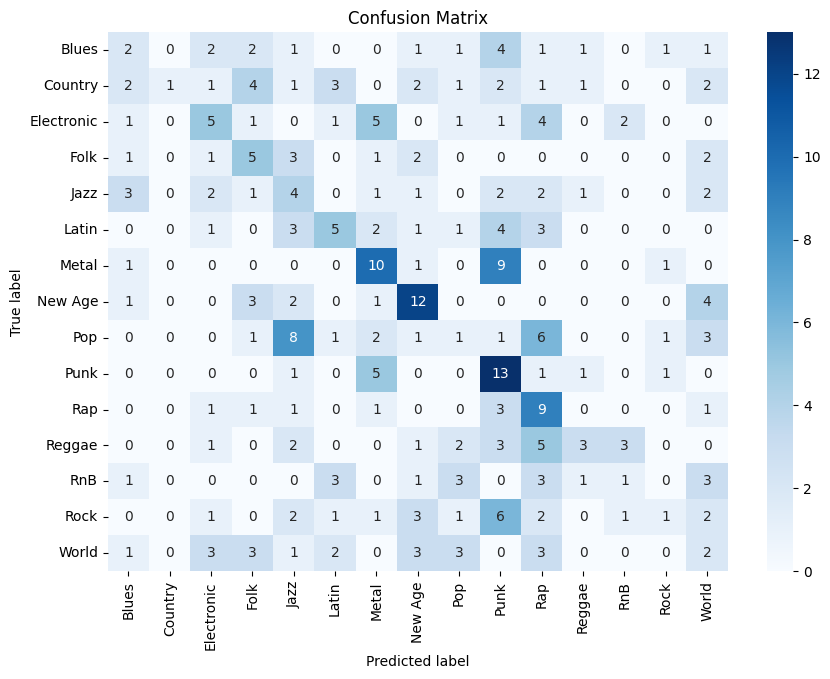

ROC AUC Score: 0.73


In [80]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_nn, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC AUC score for multi-class
# Use the one-hot encoding for multi-class ROC AUC
y_test_binarized = label_binarize(y_test_nn, classes=np.arange(len(label_encoder.classes_)))
roc_auc = roc_auc_score(y_test_binarized, predictions, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc:.2f}")